In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [2]:
df = pd.read_excel(r"C:\Users\vatch\Downloads\archive (16)\Telco_customer_churn.xlsx")
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [3]:
drop_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
             'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']
df.drop(columns=drop_cols, inplace=True)

In [4]:
df.dropna(inplace=True)

In [5]:
y = df['Churn Value']
X = df.drop(columns=['Churn Value'])
print(X)
print(y)

      Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0       Male             No      No         No              2           Yes   
1     Female             No      No        Yes              2           Yes   
2     Female             No      No        Yes              8           Yes   
3     Female             No     Yes        Yes             28           Yes   
4       Male             No      No        Yes             49           Yes   
...      ...            ...     ...        ...            ...           ...   
7038  Female             No      No         No             72           Yes   
7039    Male             No     Yes        Yes             24           Yes   
7040  Female             No     Yes        Yes             72           Yes   
7041  Female             No     Yes        Yes             11            No   
7042    Male             No      No         No             66           Yes   

        Multiple Lines Internet Service      Online

In [6]:
X = pd.get_dummies(X, drop_first=True)
print(X)

      Tenure Months  Monthly Charges  Gender_Male  Senior Citizen_Yes  \
0                 2            53.85         True               False   
1                 2            70.70        False               False   
2                 8            99.65        False               False   
3                28           104.80        False               False   
4                49           103.70         True               False   
...             ...              ...          ...                 ...   
7038             72            21.15        False               False   
7039             24            84.80         True               False   
7040             72           103.20        False               False   
7041             11            29.60        False               False   
7042             66           105.65         True               False   

      Partner_Yes  Dependents_Yes  Phone Service_Yes  \
0           False           False               True   
1          

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(X_scaled)

[[-1.23672422 -0.36266036  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [-1.23672422  0.19736523 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.99240204  1.1595457  -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 ...
 [ 1.61370124  1.27753328 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.87024095 -1.1686319  -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [ 1.36937906  1.35896134  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 1.57298088  1.12630976  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.66663913  0.94517388 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.01511331  1.30578383 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 ...
 [-0.54447804 -1.48104974  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [ 0.10704778 -1.49102052  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.05583367  1.28584227  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]] [[-0.70735949  0.70255152 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.5851984  -0.26461433  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [-1.23672422 -1.48769693 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 ...
 [-1.23672422  0.85045145 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]
 [ 1.45081979  1.51018486  0.99053183 ... -0.01191659 -0.01191659
  -0.03955095]
 [-0.09655404  1.16120749 -1.00955867 ... -0.01191659 -0.01191659
  -0.03955095]] 2142    0
1623  

In [10]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [12]:
print("log_model:",log_model)
print("log_preds:",log_preds)

log_model: LogisticRegression(max_iter=1000)
log_preds: [1 0 0 ... 0 0 1]


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [17]:
print("🔹 Logistic Regression Report:\n", classification_report(y_test, log_preds))
print("🔹 KNN Report:\n", classification_report(y_test, knn_preds))


🔹 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1009
           1       0.61      0.61      0.61       400

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.78      0.78      0.78      1409

🔹 KNN Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.82      1009
           1       0.24      0.03      0.05       400

    accuracy                           0.70      1409
   macro avg       0.48      0.50      0.44      1409
weighted avg       0.58      0.70      0.60      1409



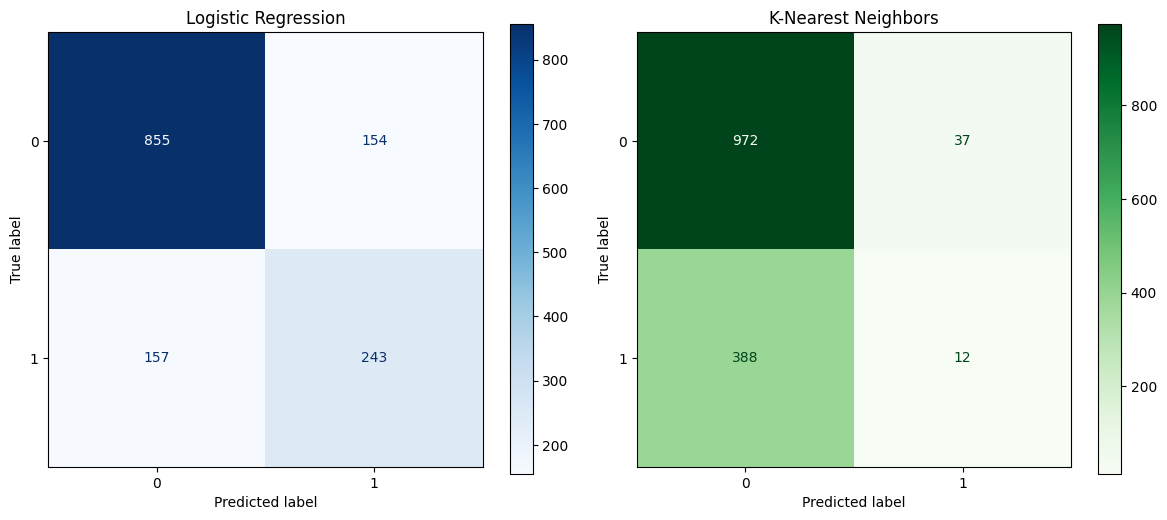

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[1], cmap='Greens')
ax[1].set_title("K-Nearest Neighbors")

plt.tight_layout()
plt.show()

In [20]:
log_probs = log_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

In [25]:
print("log_probs:",log_probs)
print("knn_probs:",knn_probs)
print("fpr_log, tpr_log, _ :",fpr_log, tpr_log, _ )
print("fpr_knn, tpr_knn, _  :",fpr_knn, tpr_knn, _  )

log_probs: [0.87751051 0.00280057 0.00872312 ... 0.31017029 0.05682983 0.93038564]
knn_probs: [0.2 0.  0.8 ... 0.  0.  0. ]
fpr_log, tpr_log, _ : [0.00000000e+00 0.00000000e+00 9.91080278e-04 9.91080278e-04
 1.98216056e-03 1.98216056e-03 2.97324083e-03 2.97324083e-03
 4.95540139e-03 4.95540139e-03 5.94648167e-03 5.94648167e-03
 9.91080278e-03 9.91080278e-03 1.09018831e-02 1.09018831e-02
 1.18929633e-02 1.18929633e-02 1.38751239e-02 1.38751239e-02
 1.48662042e-02 1.48662042e-02 1.58572844e-02 1.58572844e-02
 1.68483647e-02 1.68483647e-02 1.88305253e-02 1.88305253e-02
 2.08126858e-02 2.08126858e-02 2.18037661e-02 2.18037661e-02
 2.27948464e-02 2.27948464e-02 2.37859267e-02 2.37859267e-02
 2.47770069e-02 2.47770069e-02 2.57680872e-02 2.57680872e-02
 2.67591675e-02 2.67591675e-02 2.77502478e-02 2.77502478e-02
 2.97324083e-02 2.97324083e-02 3.17145689e-02 3.17145689e-02
 3.27056492e-02 3.27056492e-02 3.36967294e-02 3.36967294e-02
 3.46878097e-02 3.46878097e-02 3.96432111e-02 3.96432111e-02


In [28]:
auc_log = auc(fpr_log, tpr_log)
auc_knn = auc(fpr_knn, tpr_knn)


In [29]:
print("auc_log:",auc_log)
print("auc_knn:",auc_knn)

auc_log: 0.8163763627353816
auc_knn: 0.5381020812685827


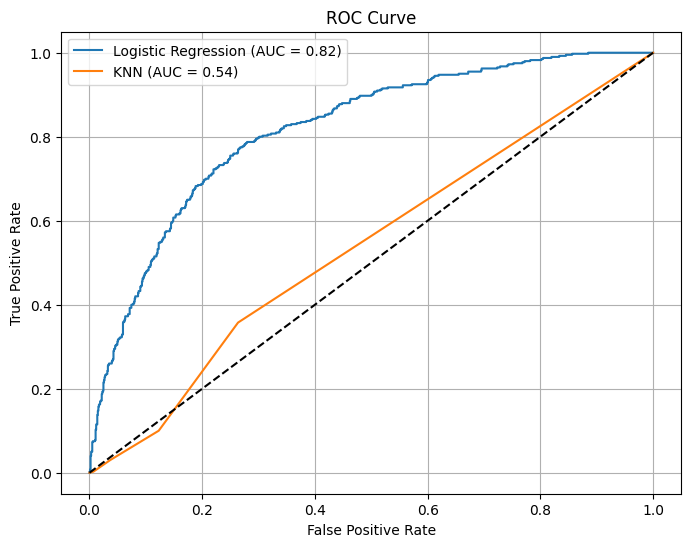

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()